In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
folder = "Dataset folder location
images = []
labels = []

for filename in os.listdir(folder):
  
  image_path = os.path.join(folder, filename)
  img = cv2.imread(image_path)
  label = filename.split("(")[0]

  images.append(img)
  labels.append(label)

images_array = np.array(images)
labels_array = np.array(labels)

np.save("images_data.npy", images_array)
np.save("labels_data.npy", labels_array)

In [3]:
images_array.shape

(102, 562, 562, 3)

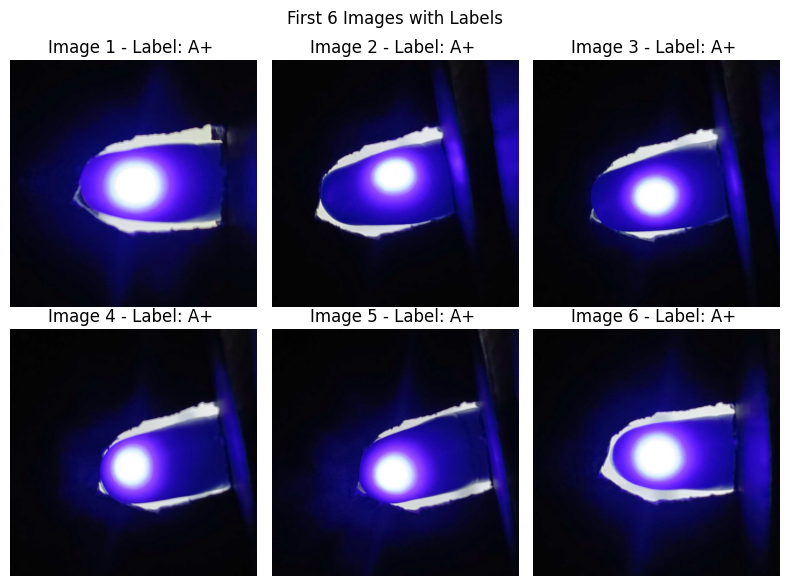

In [4]:

fig, axes = plt.subplots(2, 3, figsize=(8, 6))

for i in range(6):
  image = images[i]
  label = labels[i]

  axes[i // 3, i % 3].imshow(image)
  axes[i // 3, i % 3].set_title(f"Image {i+1} - Label: {label}")
  axes[i // 3, i % 3].axis("off")

# Adjust layout and display the plot
fig.suptitle(f"First 6 Images with Labels", fontsize=12)
plt.tight_layout()
plt.show()

In [5]:
images_array = images_array.reshape(images_array.shape[0], 562, 562, 3)
labels_array = labels_array.reshape(-1,1)

In [6]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(labels_array)
ohe.categories_

[array(['A+ ', 'A- ', 'AB+ ', 'B+ ', 'O+ ', 'O- '], dtype='<U4')]

In [7]:
y = ohe.transform(labels_array)
y = y.toarray()
len(y)

102

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_array, y, test_size=0.25, random_state=42)

In [9]:
input_shape = X_train[0].shape
input_shape

(562, 562, 3)

In [10]:
y_train[0]

array([1., 0., 0., 0., 0., 0.])

In [11]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(562, 562, 3)))
model.add(Conv2D(92, (4, 4), activation='relu'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten(input_shape=(91,91)))
model.add(Dense(28, activation= 'relu'))
model.add(Dense(6, activation= 'softmax' ))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 560, 560, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 557, 557, 92)      94300     
                                                                 
 max_pooling2d (MaxPooling2  (None, 185, 185, 92)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 183, 183, 32)      26528     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 91, 91, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 264992)            0

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=5)

Epoch 1/5
3/3 [==============================] - 168s 42s/step - loss: 417.6964 - accuracy: 0.1842 - val_loss: 34.8985 - val_accuracy: 0.0385
Epoch 2/5
3/3 [==============================] - 135s 41s/step - loss: 15.6207 - accuracy: 0.1579 - val_loss: 16.0976 - val_accuracy: 0.1538
Epoch 3/5
3/3 [==============================] - 133s 38s/step - loss: 8.2981 - accuracy: 0.3158 - val_loss: 1.7168 - val_accuracy: 0.3846
Epoch 4/5
3/3 [==============================] - 132s 38s/step - loss: 1.3492 - accuracy: 0.6316 - val_loss: 1.6097 - val_accuracy: 0.2308
Epoch 5/5
3/3 [==============================] - 137s 42s/step - loss: 0.9344 - accuracy: 0.6184 - val_loss: 1.5329 - val_accuracy: 0.3462


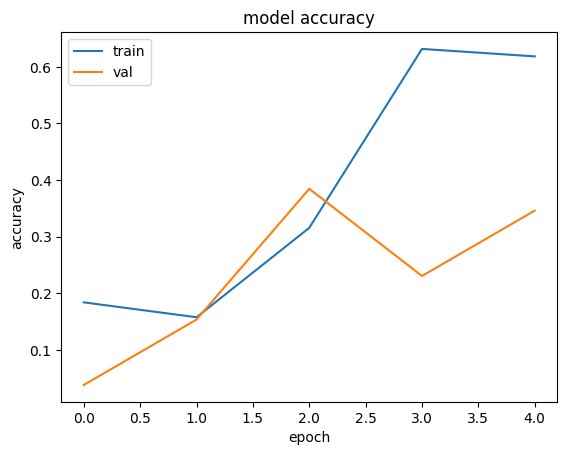

In [17]:
plt.plot(history.history[ "accuracy" ])
plt.plot(history.history[ "val_accuracy" ])
plt.title( "model accuracy" )

plt.ylabel( "accuracy" )
plt.xlabel( "epoch" )
plt.legend([ "train" , "val" ], loc= "upper left" )
plt.show()

In [18]:
y_pred = model.predict(X_test)

1/1 [==============================] - 10s 10s/step


In [21]:
max_indices = np.argmax(y_pred, axis=1)
y_pred_one_hot = np.zeros_like(y_pred)
rows = np.arange(len(y_pred))
y_pred_one_hot[rows, max_indices] = 1

In [27]:
y_pred = ohe.inverse_transform(y_pred_one_hot)
y_test = ohe.inverse_transform(y_test)

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.34615384615384615


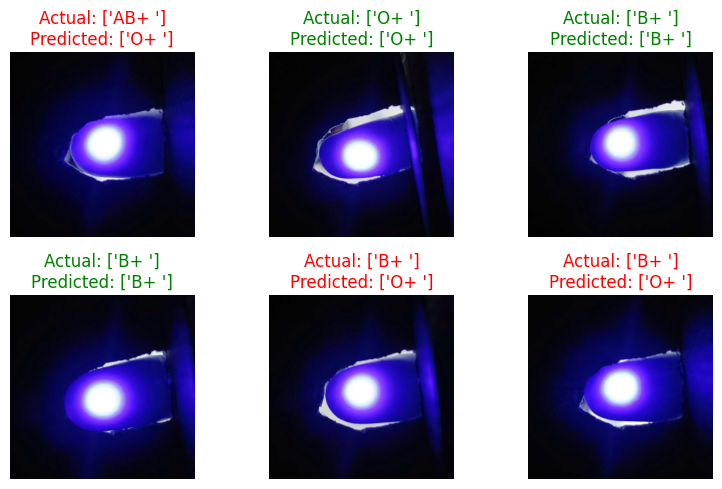

In [33]:
plt.figure(figsize=(8, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_test[i])
    actual_label = y_test[i]
    predicted_label = y_pred[i]
    if actual_label == predicted_label:
        text_color = 'green'
    else:
        text_color = 'red'
    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}', color=text_color)
    plt.axis('off')
plt.tight_layout()
plt.show()